## Imports

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

## Data

### Spacy Embeddings

In [2]:
ekg_denoised = pd.read_pickle('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_spacy_v2.pkl')
ekg_denoised = ekg_denoised.sample(frac=1)


In [3]:
ekg_denoised.head()

,ICD9_CODE,spacy_embeddings
61195,2,"[-0.10770822, 0.26172403, -0.24137318, -0.0139..."
29270,0,"[-0.1274955, 0.23725922, -0.20597686, 0.052719..."
50788,1,"[-0.0047168722, 0.28862834, -0.19175448, -0.01..."
17462,0,"[-0.08162924, 0.22849707, -0.11829656, -0.0803..."
21732,0,"[-0.03556302, 0.26150537, -0.22756626, 0.06201..."


### Train/Dev/Test/Split

In [5]:
X = ekg_denoised['spacy_embeddings']
y = ekg_denoised['ICD9_CODE']

In [6]:
train_X, validate_X, test_X = np.split(X.sample(frac=1), 
                                       [int(.6*len(X)), 
                                        int(.8*len(X))])

train_y, validate_y, test_y = np.split(y.sample(frac=1), 
                                       [int(.6*len(y)), 
                                        int(.8*len(y))])

In [7]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [8]:
new_train_X = []
for i in train_X:
    new_train_X.append(list(i))
train_X = np.array(new_train_X)
    
new_validate_X = []
for i in validate_X:
    new_validate_X.append(list(i))
validate_X = np.array(new_validate_X)
    
new_test_X = []
for i in test_X:
    new_test_X.append(list(i))
test_X = np.array(new_test_X)

In [9]:
train_X.shape

(40908, 300)

In [10]:
validate_X.shape

(13636, 300)

In [11]:
test_X.shape

(13636, 300)

## Model

In [49]:
inputs = tf.keras.layers.Input(shape=(300,), name='inputs')
hidden_1_out = tf.keras.layers.Dense(200, activation='relu', name='dense_1')(inputs)
dropout = tf.keras.layers.Dropout(0.2, name = 'droput')(hidden_1_out)
hidden_2_out = tf.keras.layers.Dense(100, activation='relu', name='dense2')(dropout)
classification_out = tf.keras.layers.Dense(4, activation='softmax', name='output')(hidden_2_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

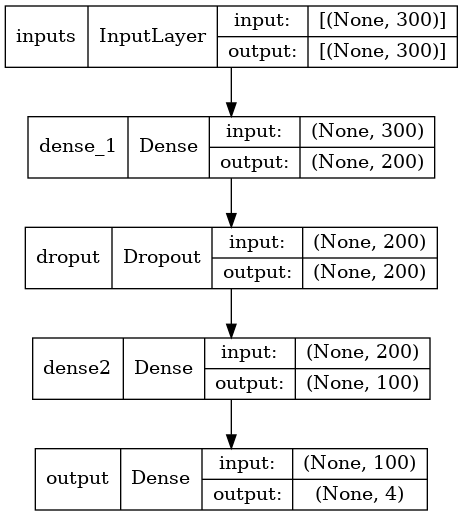

In [50]:
tf.keras.utils.plot_model(model_functional, "spacey_embeddings.png", show_shapes=True)


In [51]:
model_functional.fit(train_X, train_y, epochs=10, batch_size=512)


Epoch 1/10
80/80 [==============================] - 1s 5ms/step - loss: 1.3889 - accuracy: 0.2492
Epoch 2/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3867 - accuracy: 0.2529
Epoch 3/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3864 - accuracy: 0.2545
Epoch 4/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3859 - accuracy: 0.2590
Epoch 5/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3852 - accuracy: 0.2622
Epoch 6/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3851 - accuracy: 0.2607
Epoch 7/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3843 - accuracy: 0.2657
Epoch 8/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3838 - accuracy: 0.2627
Epoch 9/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3836 - accuracy: 0.2691
Epoch 10/10
80/80 [==============================] - 0s 5ms/step - loss: 1.3830 - accuracy: 0.2725


In [52]:
model_functional.evaluate(validate_X, validate_y)

427/427 [==============================] - 1s 1ms/step - loss: 1.3890 - accuracy: 0.2486


[1.3890208005905151, 0.2486066222190857]

No learning! Random chance would label 25% of values accurately. Averaging during the embedding stage is likely causing it to lose information